In [1]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D, Dense
from tensorflow.keras.optimizers import Adam

2024-07-29 18:44:04.620689: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-29 18:44:04.623197: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-29 18:44:04.630523: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-07-29 18:44:04.641653: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-07-29 18:44:04.644947: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-07-29 18:44:04.653968: I tensorflow/core/platform/cpu_feature_gu

# Data preparation

In [2]:
# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Add channel dimension to the data
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

# Normalize the data
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Search for optimal parameters

In [3]:
def create_model():
    model = Sequential([
        Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation="relu"),
        MaxPooling2D((2, 2)),

        Conv2D(64, (3, 3), activation="relu"),

        Flatten(),
        Dense(64, activation="relu"),

        Dense(10, activation="softmax")
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Create model

In [4]:
model = create_model()

model.fit(x_train, y_train, epochs=6, batch_size=52, validation_split=0.1)

# Evaluate the final model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_acc}, Test loss: {test_loss}')



/home/kamil/Desktop/Data_science/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.7140 - loss: 0.7772 - val_accuracy: 0.8672 - val_loss: 0.3734
Epoch 2/6
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.8706 - loss: 0.3630 - val_accuracy: 0.8783 - val_loss: 0.3295
Epoch 3/6
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.8921 - loss: 0.2945 - val_accuracy: 0.8993 - val_loss: 0.2795
Epoch 4/6
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9019 - loss: 0.2681 - val_accuracy: 0.8970 - val_loss: 0.2797
Epoch 5/6
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9110 - loss: 0.2435 - val_accuracy: 0.9058 - val_loss: 0.2684
Epoch 6/6
1039/1039 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.9206 - loss: 0.2153 - val_accuracy: 0.9095 - val_loss: 0.2538
313/313 - 0s - 1ms/step - accuracy: 0.9050 - loss: 0.2652

Test accuracy: 0.9049999713897705, Test loss: 0.2652134299278259


# Save model

In [5]:
model.save("model_part_1.keras")

# Classification test

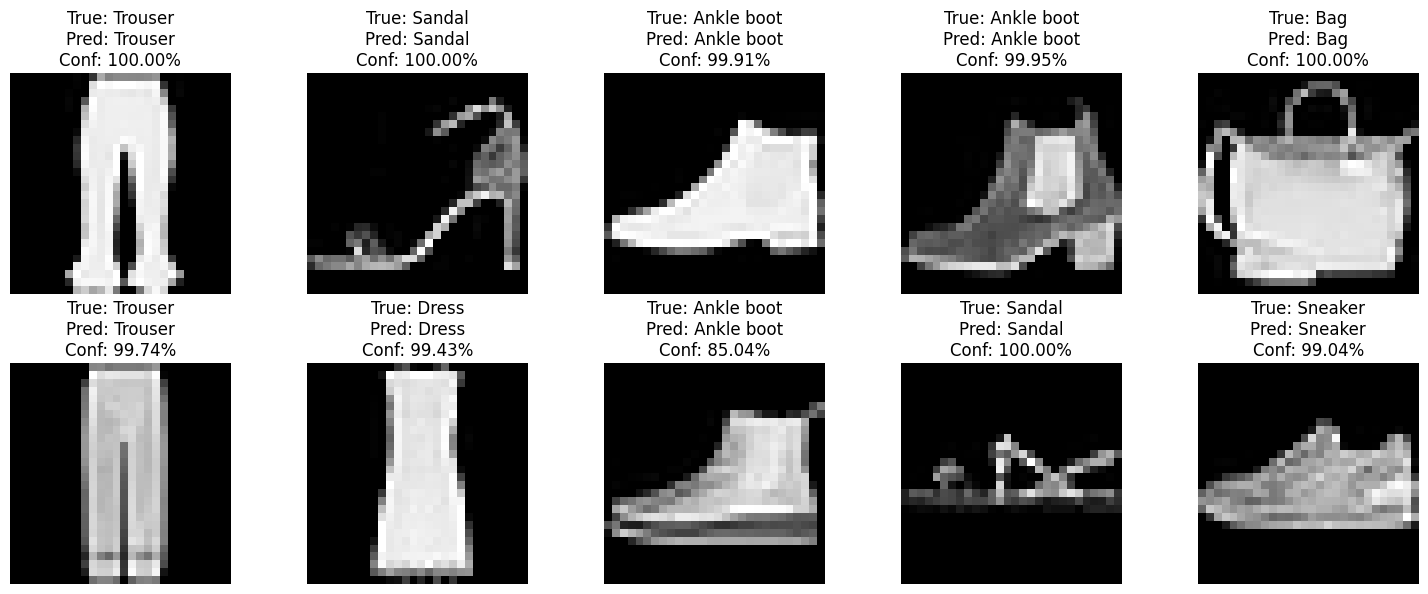

In [6]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Generating a list of unique, random numbers
unique_random_numbers = random.sample(range(len(x_test)), 10)

# Dictionary to map labels to their respective names
fm_label = {
    0: "T-shirt/top",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

# Setting up the grid layout
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Iterating over unique random numbers and displaying images with predictions
for ax, sample_num in zip(axes.flatten(), unique_random_numbers):
    x1 = x_test[sample_num].reshape(28, 28)
    prediction = model(np.array([x_test[sample_num]]))
    
    # Get predicted label and confidence
    predicted_probs = prediction[0]  # Assuming prediction is of shape (1, num_classes)
    predicted_label = np.argmax(predicted_probs)
    confidence = predicted_probs[predicted_label] * 100  # Convert to percentage
    
    # Get true label
    true_label = np.argmax(y_test[sample_num])  # Assuming y_test is one-hot encoded
    
    # Translate labels to names
    true_label_name = fm_label[true_label]
    predicted_label_name = fm_label[predicted_label]

    # Display image with title showing true label, predicted label, and confidence
    ax.imshow(x1, cmap='gray')
    ax.set_title(f"True: {true_label_name}\nPred: {predicted_label_name}\nConf: {confidence:.2f}%")
    ax.axis('off')

plt.tight_layout()
plt.show()


# Comparison of Previous and Current Tasks

Previous classification test

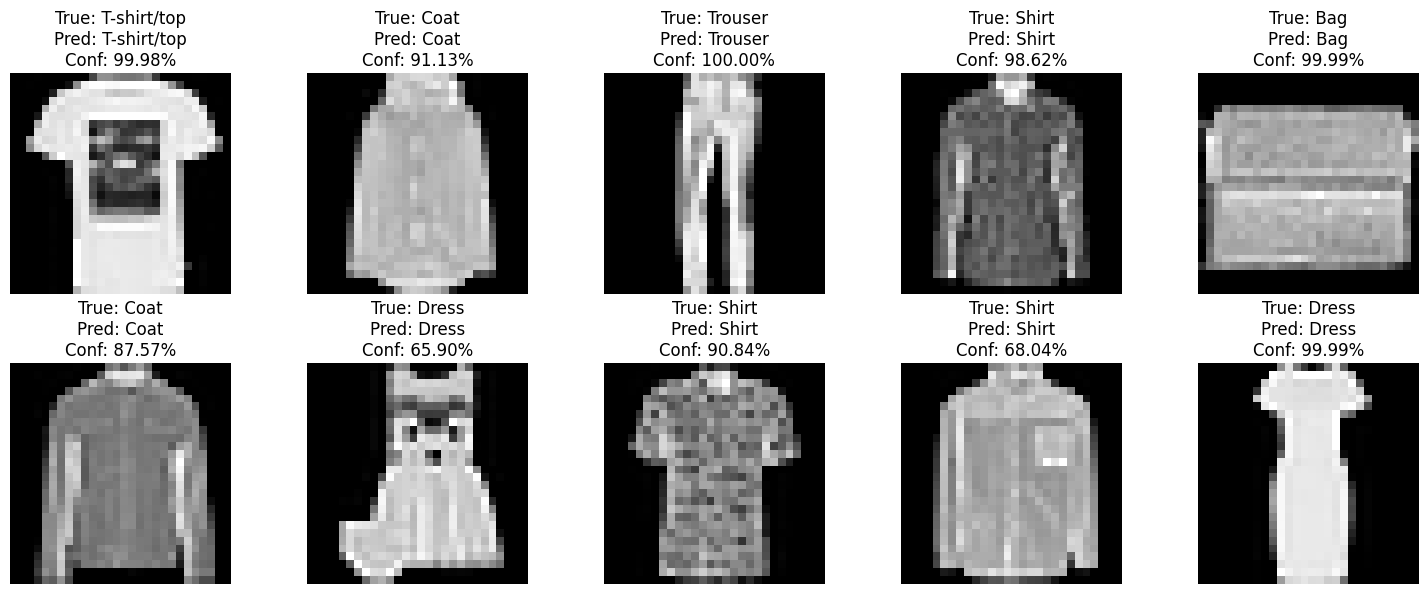


| Metric / Observation                | Previous Task: Dense Neural Network | Current Task: Convolutional Neural Network |
|-------------------------------------|-------------------------------------|--------------------------------------------|
| **Test Accuracy**                   | 0.8859                              | 0.9050                                     |
| **Test Loss**                       | 0.3291                              | 0.2652                                     |
| **Correct Predictions**             | 10 out of 10                        | 10 out of 10                               |
| **Confidence Levels**               |                                     |                                            |
| - < 70% Confidence                  | 2 predictions                       | 1 prediction                               |
| - ~85% Confidence                   | N/A                                 | 1 prediction                               |
| - ~90% Confidence                   | 1 prediction                        | 1 prediction                               |
| - ~100% Confidence                  | Remaining predictions, with one at exactly 100% | Remaining predictions, with multiple at exactly 100% |

# Summary

The fully connected network achieved a relatively high accuracy of 88.59%, but exhibited high loss (0.3291), indicating significant errors. The model often had high-confidence misclassifications. In contrast, the convolutional neural network demonstrated improved performance with higher accuracy (90.50%) and lower loss (0.2652). The CNN showed more consistent confidence levels aligned with its accuracy, reducing the number of low-confidence predictions and improving overall reliability. The CNN was more effective in learning and classifying the Fashion MNIST dataset, resulting in better performance and fewer errors.